In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df=pd.read_csv("UberDataset.csv")

In [5]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [11]:
df['PURPOSE'].fillna("NOT",inplace=True)


In [13]:
df['START_DATE']=pd.to_datetime(df['START_DATE'], errors='coerce')
df['END_DATE']=pd.to_datetime(df['END_DATE'], errors='coerce')


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  421 non-null    datetime64[ns]
 1   END_DATE    420 non-null    datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1156 non-null   float64       
 6   PURPOSE     1156 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


In [17]:
from datetime import datetime

In [18]:
df['DATE']=pd.DatetimeIndex(df["START_DATE"]).date
df['TIME']=pd.DatetimeIndex(df["START_DATE"]).hour


In [20]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DATE,TIME
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0


In [22]:
df['day_night']=pd.cut(x=df['TIME'],bins=[0,10,15,19,24],labels=['MORNING','AFTERNOON','EVENING','NIGHT'])

In [23]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DATE,TIME,day_night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,NIGHT
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,MORNING
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,NIGHT
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,EVENING
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,AFTERNOON


In [25]:
df.shape

(1156, 10)

In [26]:
df.dropna(inplace=True)

In [27]:
df.shape

(413, 10)

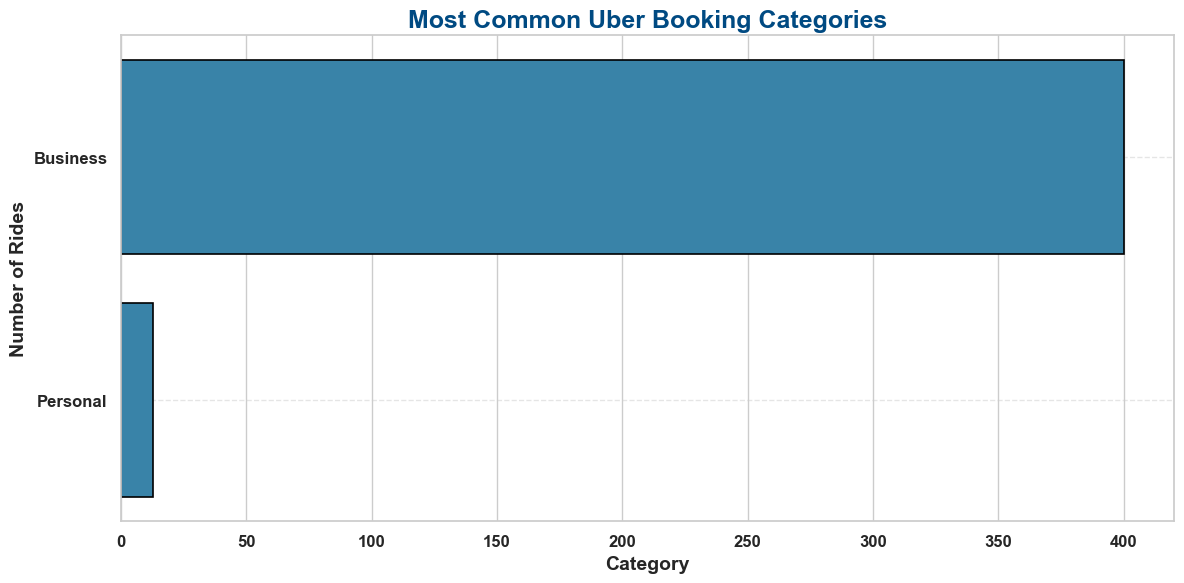

In [125]:
plt.figure(figsize=(12, 6))  

order = df['CATEGORY'].value_counts().index


sns.countplot(data=df, y='CATEGORY', color="#2789BA", edgecolor='black', linewidth=1.2, order=order)


plt.title('Most Common Uber Booking Categories', fontweight='bold', fontsize=18, color="#004A82")
plt.xlabel('Category', fontweight='bold', fontsize=14)
plt.ylabel('Number of Rides', fontweight='bold', fontsize=14)


plt.xticks(fontweight='bold', fontsize=12)
plt.yticks(fontweight='bold', fontsize=12)


plt.grid(axis='y', linestyle='--', alpha=0.5)


plt.tight_layout()
plt.show()

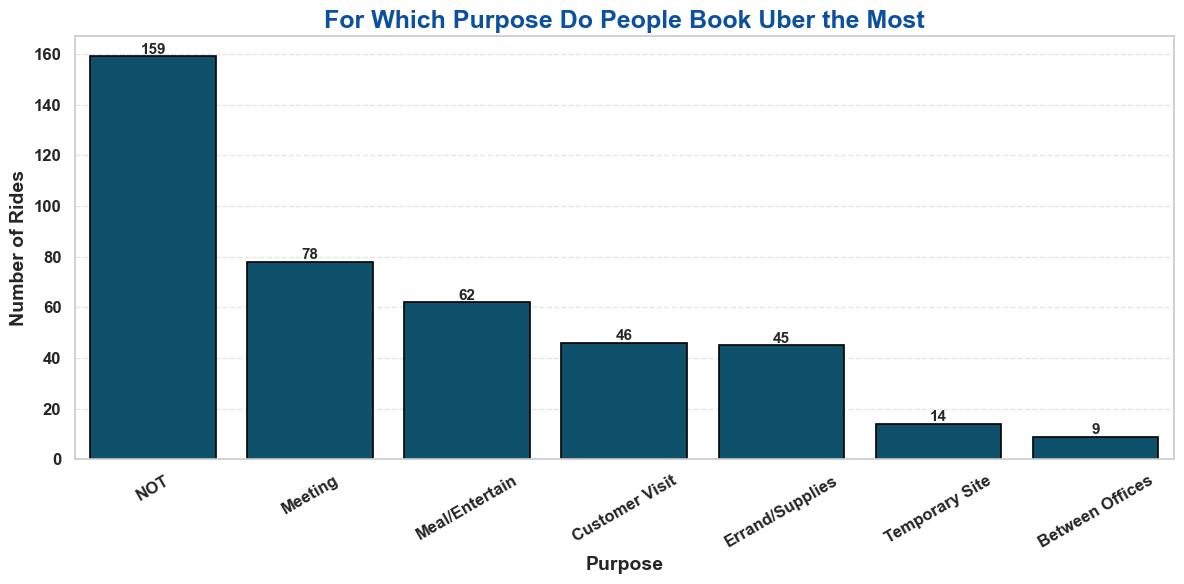

In [126]:
plt.figure(figsize=(12, 6))


order = df['PURPOSE'].value_counts().index


ax = sns.countplot(data=df, x='PURPOSE', color='#005779', edgecolor='black', linewidth=1.2, order=order)


for bar in ax.patches:
    count = int(bar.get_height())
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    ax.text(x, y + 1, count, ha='center', fontsize=11, fontweight='bold')


plt.title('For Which Purpose Do People Book Uber the Most', fontweight='bold', fontsize=18, color="#0C509F")
plt.xlabel('Purpose', fontweight='bold', fontsize=14)
plt.ylabel('Number of Rides', fontweight='bold', fontsize=14)
plt.xticks(rotation=30, fontweight='bold', fontsize=12)
plt.yticks(fontweight='bold', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


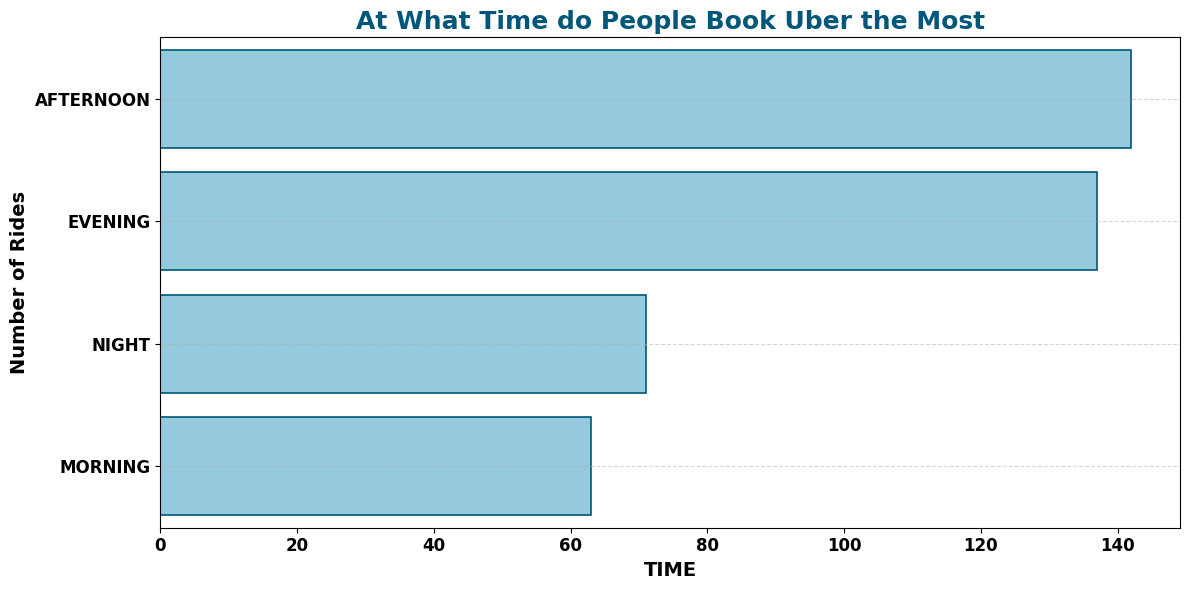

In [85]:
plt.figure(figsize=(12, 6))  

order = df['day_night'].value_counts().index


sns.countplot(data=df, y='day_night', color='skyblue', edgecolor='#005779', linewidth=1.2, order=order)


plt.title('At What Time do People Book Uber the Most', fontweight='bold', fontsize=18, color="#005779")
plt.xlabel('TIME', fontweight='bold', fontsize=14)
plt.ylabel('Number of Rides', fontweight='bold', fontsize=14)


plt.xticks(fontweight='bold', fontsize=12)
plt.yticks(fontweight='bold', fontsize=12)


plt.grid(axis='y', linestyle='--', alpha=0.5)


plt.tight_layout()
plt.show()

In [80]:
df['MONTH']=pd.DatetimeIndex(df['START_DATE']).month
month_label = {
    1.0: 'Jan', 2.0: 'Feb', 3.0: 'Mar', 4.0: 'Apr',
    5.0: 'May', 6.0: 'Jun', 7.0: 'Jul', 8.0: 'Aug',
    9.0: 'Sep', 10.0: 'Oct', 11.0: 'Nov', 12.0: 'Dec'
}
df['MONTH'] = df.MONTH.map(month_label)
mon= df.MONTH.value_counts(sort=False)


In [81]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DATE,TIME,day_night,MONTH
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,NIGHT,Jan
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,MORNING,Jan
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,NIGHT,Jan
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,EVENING,Jan
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,AFTERNOON,Jan


<Figure size 1200x600 with 0 Axes>

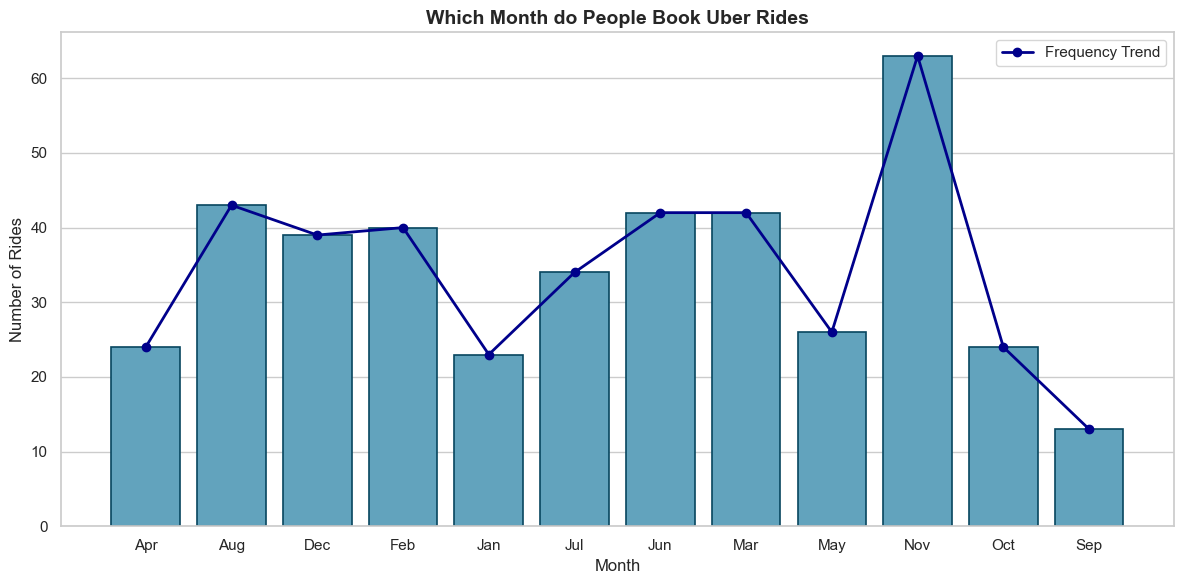

In [134]:
plt.figure(figsize=(12,6))
month_counts = df['MONTH'].value_counts().sort_index()

# Plot the bar chart (countplot)
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
sns.countplot(data=df, x='MONTH', order=month_counts.index,
              color="#53AACC", edgecolor="#07465F", linewidth=1.2)

# Overlay a line showing frequency
plt.plot(range(len(month_counts)), month_counts.values, 
         color='darkblue', marker='o', linewidth=2, label='Frequency Trend')

# Add title and labels
plt.title('Which Month do People Book Uber Rides', fontweight='bold', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Number of Rides')
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


In [105]:
df['DAY'] = df.START_DATE.dt.weekday
day_label = {0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thur', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
df['DAY'] = df[ 'DAY'].map(day_label)

In [106]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DATE,TIME,day_night,MONTH,DAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,NIGHT,Jan,Fri
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,MORNING,Jan,Sat
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,NIGHT,Jan,Sat
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,EVENING,Jan,Tues
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,AFTERNOON,Jan,Wed


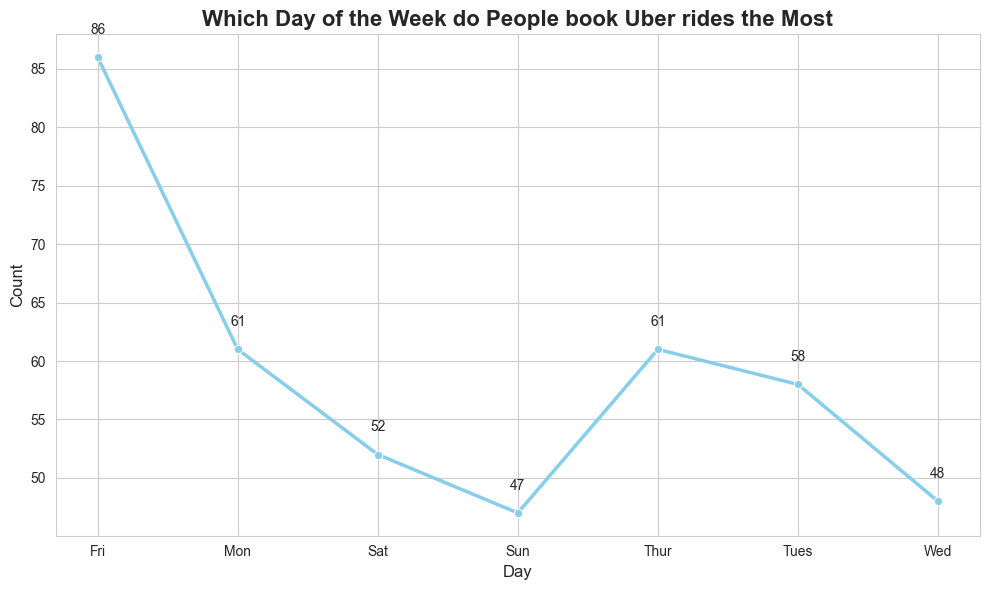

In [109]:
day_label = df['DAY'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

sns.lineplot(x=day_label.index, y=day_label.values, 
             marker='o', linewidth=2.5, color='skyblue')

plt.title("Which Day of the Week do People book Uber rides the Most", fontsize=16, fontweight='bold')
plt.xlabel("Day", fontsize=12)
plt.ylabel("Count", fontsize=12)

for i, val in enumerate(day_label.values):
    plt.text(day_label.index[i], val + max(day_label.values)*0.02, 
             str(val), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


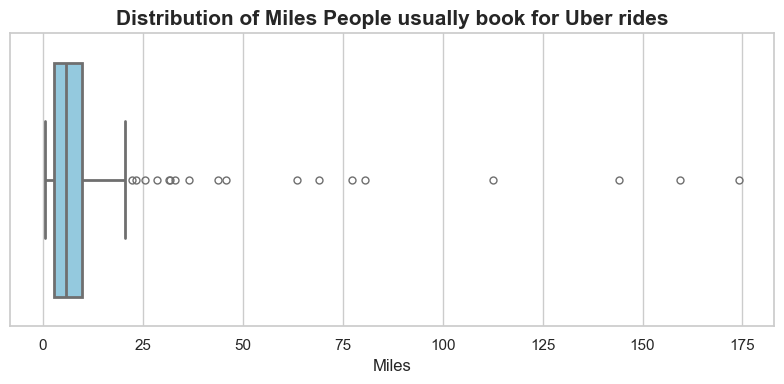

In [123]:
sns.set(style="whitegrid")


plt.figure(figsize=(8, 4))


sns.boxplot(x=df['MILES'], color='skyblue', linewidth=2, fliersize=5)


plt.title("Distribution of Miles People usually book for Uber rides", fontsize=15, fontweight='bold')
plt.xlabel("Miles", fontsize=12)


plt.tight_layout()
plt.show()